# Importing and loading dataset

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [54]:
ds = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [55]:
ds

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [56]:
temp = ds["long_lat"].str.split(' ',n=1,expand=True)
ds["Long"] = temp[0]
ds["Lat"] = temp[1]
ds.drop(columns =["long_lat"], inplace = True)
ds.head()

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Long,Lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,NaN,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,NaN,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,NaN,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95


In [5]:
ds[['Long', 'Lat']] = ds[['Long', 'Lat']].apply(pd.to_numeric)
ds.head()

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Long,Lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,NaN,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,NaN,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,NaN,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95


## Modifying data to obtain salaries for each customer

In [57]:
ds_sal = ds[ds['txn_description']=='PAY/SALARY']
ds_sal

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Long,Lat
50,posted,NaN,0,ACC-588564840,AUD,PAY/SALARY,NaN,0.0,Isaiah,8342.11,...,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,151.27,-33.76
61,posted,NaN,0,ACC-1650504218,AUD,PAY/SALARY,NaN,0.0,Marissa,2040.58,...,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,145.01,-37.93
64,posted,NaN,0,ACC-3326339947,AUD,PAY/SALARY,NaN,0.0,Eric,3158.51,...,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,151.18,-33.80
68,posted,NaN,0,ACC-3541460373,AUD,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,...,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,145.00,-37.83
70,posted,NaN,0,ACC-2776252858,AUD,PAY/SALARY,NaN,0.0,Kristin,2271.79,...,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,144.95,-37.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,PAY/SALARY,NaN,0.0,Antonio,9378.51,...,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,115.78,-31.90
12000,posted,NaN,0,ACC-819621312,AUD,PAY/SALARY,NaN,0.0,Michele,3440.01,...,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,145.04,-37.85
12001,posted,NaN,0,ACC-2920611728,AUD,PAY/SALARY,NaN,0.0,Tyler,11381.44,...,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,144.96,-37.76
12003,posted,NaN,0,ACC-1799207998,AUD,PAY/SALARY,NaN,0.0,Susan,11454.52,...,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,150.68,-33.79


In [59]:
features = ["account","txn_description","first_name","balance","date","gender","age","amount","customer_id"]
ds = ds[features]
ds_temp = ds.groupby(["first_name","account","date"])
ds_temp.first()

txn_description  balance gender  age  \
first_name account        date                                              
Abigail    ACC-2528867619 2018-08-03      PAY/SALARY  1956.58      F   40   
                          2018-08-08       SALES-POS  1913.92      F   40   
                          2018-08-09      INTER BANK  1754.26      F   40   
                          2018-08-10         PAYMENT  1619.68      F   40   
                          2018-08-11             POS  3549.13      F   40   
...                                              ...      ...    ...  ...   
Virginia   ACC-3689607373 2018-10-24       SALES-POS  7929.28      F   20   
                          2018-10-26      PAY/SALARY  9068.07      F   20   
                          2018-10-27             POS  8889.23      F   20   
                          2018-10-28             POS  8872.02      F   20   
                          2018-10-29             POS  8857.23      F   20   

                                       amount     customer_id  
first_name account        date                                 
Abigail    ACC-2528867619 2018-08-03  1946.57  CUS-2505971401  
                          2018-08-08    42.66  CUS-2505971401  
                          2018-08-09    76.00  CUS-2505971401  
                          2018-08-10    80.00  CUS-2505971401  
                          2018-08-11    17.12  CUS-2505971401  
...                                       ...             ...  
Virginia   ACC-3689607373 2018-10-24     6.32   CUS-127297539  
                          2018-10-26  1138.79   CUS-127297539  
                          2018-10-27    25.63   CUS-127297539  
                          2018-10-28    17.21   CUS-127297539  
                          2018-10-29    14.79   CUS-127297539  

[5521 rows x 6 columns]

In [8]:
temp_dict = {}
for name,group in ds_temp:
    temp_dict[name[0]] = list(group["amount"]*52)[0]
ds["Annual_sal"]= ds["first_name"].map(temp_dict)
ds

/home/ankit79/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,account,txn_description,first_name,balance,date,gender,age,amount,customer_id,Annual_sal
0,ACC-1598451071,POS,Diana,35.39,2018-08-01,F,26,16.25,CUS-2487424745,1742.52
1,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,14.19,CUS-2487424745,1742.52
2,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,6.42,CUS-2142601169,966.68
3,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,40.90,CUS-1614226872,1664.00
4,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,3.25,CUS-2487424745,1742.52
...,...,...,...,...,...,...,...,...,...,...
12038,ACC-3021093232,POS,Melissa,14054.14,2018-10-31,F,30,9.79,CUS-55310383,1371.24
12039,ACC-1608363396,SALES-POS,Robert,9137.79,2018-10-31,M,20,63.87,CUS-2688605418,3172.00
12040,ACC-3827517394,POS,Craig,45394.57,2018-10-31,M,28,43.96,CUS-2663907001,2285.92
12041,ACC-2920611728,SALES-POS,Tyler,11350.67,2018-10-31,M,69,30.77,CUS-1388323263,54242.24


In [9]:
ds.corr()['Annual_sal'].sort_values()

age          -0.142771
balance       0.009681
amount        0.021636
Annual_sal    1.000000
Name: Annual_sal, dtype: float64

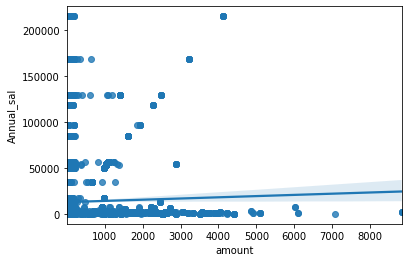

In [10]:
sns.regplot(x="amount",y="Annual_sal", data=ds)

In [11]:
ds

,account,txn_description,first_name,balance,date,gender,age,amount,customer_id,Annual_sal
0,ACC-1598451071,POS,Diana,35.39,2018-08-01,F,26,16.25,CUS-2487424745,1742.52
1,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,14.19,CUS-2487424745,1742.52
2,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,6.42,CUS-2142601169,966.68
3,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,40.90,CUS-1614226872,1664.00
4,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,3.25,CUS-2487424745,1742.52
...,...,...,...,...,...,...,...,...,...,...
12038,ACC-3021093232,POS,Melissa,14054.14,2018-10-31,F,30,9.79,CUS-55310383,1371.24
12039,ACC-1608363396,SALES-POS,Robert,9137.79,2018-10-31,M,20,63.87,CUS-2688605418,3172.00
12040,ACC-3827517394,POS,Craig,45394.57,2018-10-31,M,28,43.96,CUS-2663907001,2285.92
12041,ACC-2920611728,SALES-POS,Tyler,11350.67,2018-10-31,M,69,30.77,CUS-1388323263,54242.24


___

# Creating a Linear Regression Model for Annual Salary

In [12]:
X = ds[["amount"]].values.reshape(-1,1)
Y = ds["Annual_sal"].values.reshape(-1,1)
# X = ds_cus[["annual_salary"]]
# Y = ds_cus["age"]
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.0004681303199779441

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of test samples :", y_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("number of training samples:",y_train.shape[0])

number of test samples : 2409
number of test samples : 2409
number of training samples: 9634
number of training samples: 9634


In [14]:
RigeModel = Ridge(alpha=0.01) 
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

-0.0004752235691540818

In [15]:
lr = LinearRegression().fit(x_train, y_train)
y_predict=predict=lr.predict(x_test)

In [16]:
y_predict

array([[13239.42429634],
       [13227.60758982],
       [13253.30815518],
       ...,
       [13235.47510983],
       [13246.75188851],
       [13217.0558571 ]])

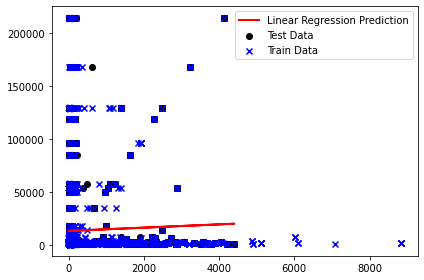

In [17]:
plt.figure()
plt.scatter(x_test, y_test,  color='black', marker='o', label='Test Data')
plt.scatter(x_train, y_train,  color='blue', marker='x', label='Train Data')
plt.plot(x_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')

plt.legend()
plt.tight_layout()

In [18]:
X = ds[["age"]]
Y = ds["Annual_sal"]
# X = ds_cus[["annual_salary"]]
# Y = ds_cus["age"]
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.020383631717573625

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of test samples :", y_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("number of training samples:",y_train.shape[0])

number of test samples : 2409
number of test samples : 2409
number of training samples: 9634
number of training samples: 9634


In [20]:
RigeModel = Ridge(alpha=0.01) 
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.014409235820651345

In [21]:
lr = LinearRegression().fit(x_train, y_train)
y_predict=predict=lr.predict(x_test)

In [22]:
y_predict

array([ 8519.60674754,  9573.62621218, 14843.72353534, ...,
        6938.57755059, 14843.72353534, 16424.75273229])

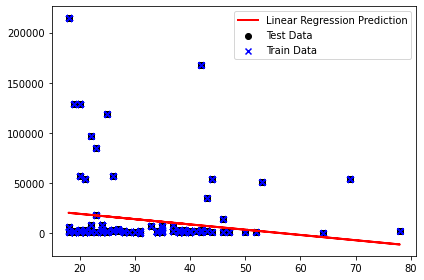

In [23]:
plt.figure()
plt.scatter(x_test, y_test,  color='black', marker='o', label='Test Data')
plt.scatter(x_train, y_train,  color='blue', marker='x', label='Train Data')
plt.plot(x_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
plt.legend()
plt.tight_layout()

In [24]:
X = ds[["balance"]]
Y = ds["Annual_sal"]
# X = ds_cus[["annual_salary"]]
# Y = ds_cus["age"]
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

9.372830936538179e-05

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of test samples :", y_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("number of training samples:",y_train.shape[0])

number of test samples : 2409
number of test samples : 2409
number of training samples: 9634
number of training samples: 9634


In [26]:
RigeModel = Ridge(alpha=0.01) 
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.00014532063005590068

In [27]:
lr = LinearRegression().fit(x_train, y_train)
y_predict=predict=lr.predict(x_test)

In [28]:
y_predict

array([13510.43624779, 13501.33284515, 13566.39585805, ...,
       13438.61935028, 13465.68797199, 13460.90252225])

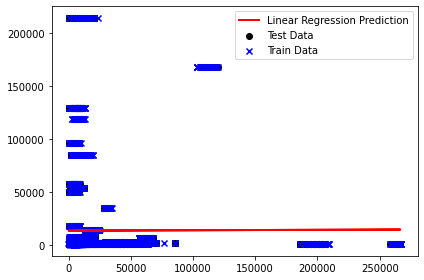

In [29]:
plt.figure()
plt.scatter(x_test, y_test,  color='black', marker='o', label='Test Data')
plt.scatter(x_train, y_train,  color='blue', marker='x', label='Train Data')
plt.plot(x_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
plt.legend()
plt.tight_layout()

In [30]:
X = ds['amount'].values.reshape(-1,1)
Y = ds['Annual_sal'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
Y_predict = reg.predict(X_test)
pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_predict.flatten()})
pred

,Actual,Predicted
0,53927.64,13098.728871
1,57184.40,14275.941617
2,1872.00,13101.797042
3,1134.64,13100.745407
4,3172.00,13130.071918
...,...,...
2404,491.92,13110.080019
2405,1508.00,13115.132202
2406,50464.44,13136.956329
2407,1742.52,13089.708665


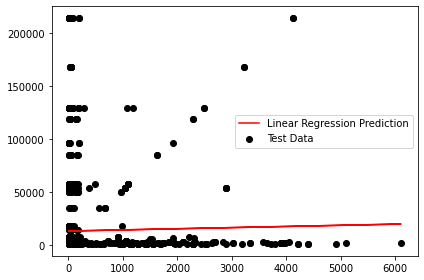

In [33]:
plt.figure()
plt.scatter(X_test, y_test,  color='black', label='Test Data')
plt.plot(X_test, Y_predict, color='red', label='Linear Regression Prediction')
plt.legend()
plt.tight_layout()

In [34]:
print("Training set Error score: "+str(reg.score(X_train,y_train)))
print("Test set Error score: "+str(reg.score(X_test,y_test)))

Training set Error score: 0.00033358547422512874
Test set Error score: 0.000520927263965576


#  Creating a Decision Tree Model for Annual Salary

In [35]:
ds = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [36]:
ds_sal = ds[ds["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
ds_sal.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [37]:
salaries = []

for customer_id in ds["customer_id"]:
    salaries.append(int(ds_sal.loc[customer_id]["amount"]*52))
    
ds["Annual_sal"] = salaries

In [38]:
ds["Annual_sal"].tail()

12038     85109
12039    120655
12040    210848
12041     54242
12042     51804
Name: Annual_sal, dtype: int64

In [39]:
ds_cat = ds[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [40]:
ds_cat.head()

,txn_description,gender,age,merchant_state,movement
0,POS,F,26,QLD,debit
1,SALES-POS,F,26,NSW,debit
2,POS,M,38,NSW,debit
3,SALES-POS,F,40,QLD,debit
4,SALES-POS,F,26,QLD,debit


In [41]:
pd.get_dummies(ds_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [42]:
N_train = int(len(ds)*0.5)
X_train = pd.get_dummies(ds_cat).iloc[:N_train]
Y_train = ds["Annual_sal"].iloc[:N_train]
X_test = pd.get_dummies(ds_cat).iloc[:N_train]
Y_test = ds["Annual_sal"].iloc[:N_train]

In [43]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[17 17 16 ... 32  9 27]
multiclass
multiclass
multiclass


In [44]:
decision_tree_class = DecisionTreeClassifier()
decision_tree_class.fit(X_train, training_scores_encoded)
print("DecisionTree")
print(decision_tree_class.predict(X_test))

DecisionTree
[17 17 16 ... 32  9 27]


## Classification

In [45]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)

0.7904002657365886

In [46]:
decision_tree_class.predict(X_test)

array([52710, 52710, 52110, ..., 74722, 47707, 66168])

In [47]:
y_predict = decision_tree_class.predict(X_test)

In [48]:
decision_tree_class.score(X_test, Y_test)

0.7904002657365886

## Prediction

In [49]:
decision_tree_reg = DecisionTreeRegressor()

In [50]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7541844384616704

In [51]:
decision_tree_reg.predict(X_test)

array([53137.05940594, 69963.2       , 66072.74193548, ...,
       74722.        , 47707.        , 66168.        ])

In [52]:
decision_tree_reg.score(X_test, Y_test)

0.7541844384616704